In [1]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib. pyplot as plt 
from datetime import datetime 
from visualization import plot_time_series, plot_time_series_with_moving_averages
plt.style.use('fivethirtyeight')

In [3]:
end=datetime.now()
start=datetime(end.year-15,end.month,end.day)
stock=('BTC-USD')
stock_data=yf.download(stock,start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-08,95043.523438,97258.320312,92525.843750,96924.164062,63875859171
2025-01-09,92484.039062,95349.718750,91220.843750,95043.484375,62777261693
2025-01-10,94701.453125,95770.609375,92250.093750,92494.492188,62058693684
2025-01-11,94566.593750,94977.687500,93840.046875,94700.835938,18860894100
2025-01-12,94521.468750,94608.023438,93743.234375,94567.640625,18560684032


In [6]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3771.0,1.983016e+04,2.251099e+04,1.781030e+02,1.235960e+03,9.377014e+03,3.108919e+04,1.061406e+05
High,BTC-USD,3771.0,2.025035e+04,2.296949e+04,2.117310e+02,1.254795e+03,9.546319e+03,3.194279e+04,1.082684e+05
Low,BTC-USD,3771.0,1.934362e+04,2.197896e+04,1.715100e+02,1.215590e+03,9.232484e+03,3.022722e+04,1.052917e+05
Open,BTC-USD,3771.0,1.980652e+04,2.248237e+04,1.768970e+02,1.232040e+03,9.375080e+03,3.092723e+04,1.061473e+05
Volume,BTC-USD,3771.0,1.865263e+10,2.037397e+10,5.914570e+06,4.292545e+08,1.472210e+10,2.986871e+10,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3771 entries, 2014-09-17 to 2025-01-12
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3771 non-null   float64
 1   (High, BTC-USD)    3771 non-null   float64
 2   (Low, BTC-USD)     3771 non-null   float64
 3   (Open, BTC-USD)    3771 non-null   float64
 4   (Volume, BTC-USD)  3771 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.8 KB


In [8]:
#closing price history
closing_price=stock_data[['Close']]


In [9]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-01-08,95043.523438
2025-01-09,92484.039062


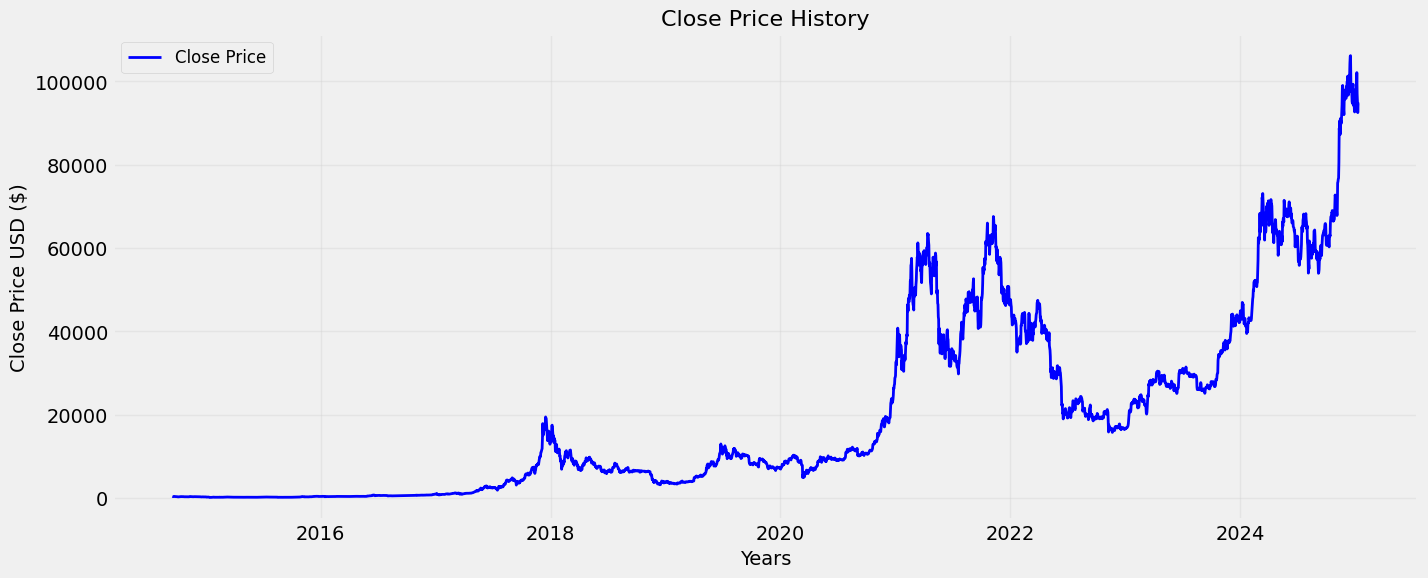

In [10]:
# plot the closing price history
plot_time_series(
    data=closing_price,
    column='Close',
    title='Close Price History',
    xlabel='Years',
    ylabel='Close Price USD ($)',
    label='Close Price'
)

In [11]:
#calculte the moving average
for i in range(2014,2025):
    print(i,list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [12]:
closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()

C:\Users\Yoni\AppData\Local\Temp\ipykernel_16944\153895848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
C:\Users\Yoni\AppData\Local\Temp\ipykernel_16944\153895848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()


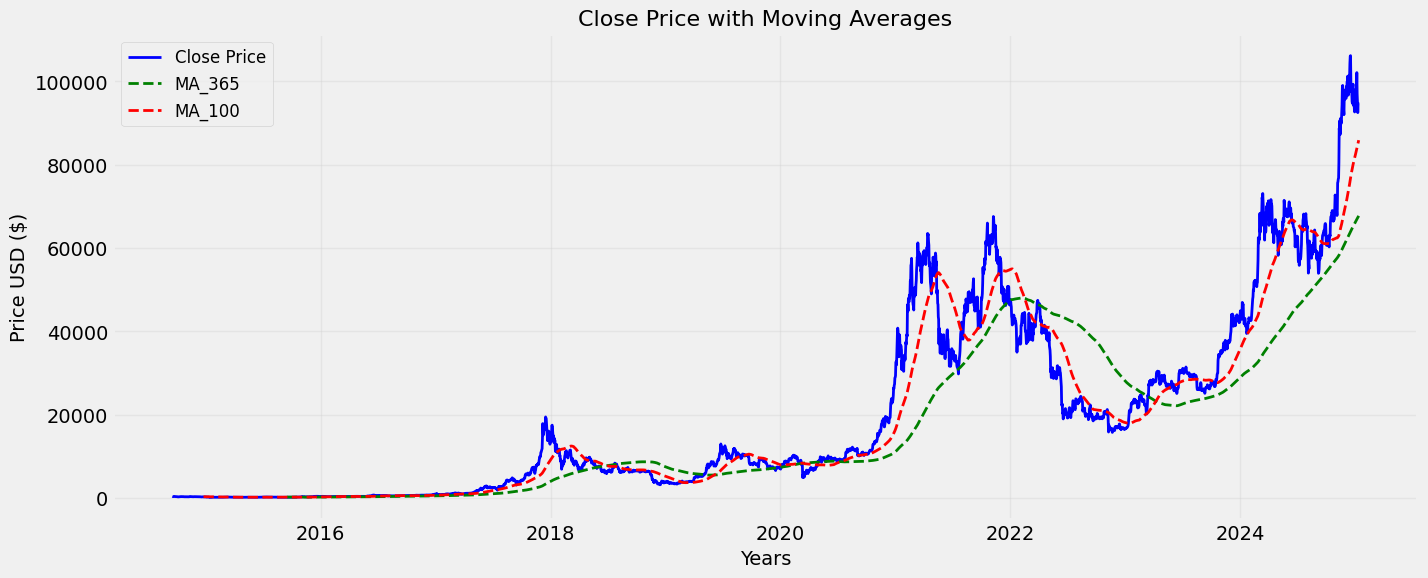

In [14]:
plot_time_series_with_moving_averages(
    data=closing_price,
    column='Close',
    ma_columns=['MA_365', 'MA_100'],
    ma_styles=[{'color': 'green', 'linestyle': '--'}, {'color': 'red', 'linestyle': '--'}],
    title='Close Price with Moving Averages',
    xlabel='Years',
    ylabel='Price USD ($)',
    label='Close Price'
)
